In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import feature_engine.missing_data_imputers as mdi
import feature_engine.categorical_encoders as ce
from sklearn.feature_selection import VarianceThreshold

import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.feature_selection import SelectFromModel, RFE

In [15]:
data = pd.read_csv(r'C:\Users\1000257489\Documents\Paris-D\Analysis\20200626 Paris C HDD ACC Prediction\Data\wafer_head_media_hdd_2.csv')

data.shape

C:\Users\1000257489\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,5,7,8,9,10,12,13,30,33,114,144,158,170,171,180,191,207,235,248,254,258,259,261,307,308,314,317,319,320,323,325,329,331,332,338,340,342,343,344,346,347,353,354,355,356,357,358,359,360,366,367,368,370,743,744,745,746,748,749,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,769,770,772,773,774,775,776,777,779,780,782,783,784,785,786,787,788,789,790,791,821,822,832,833,834,835,836,839,840,843,847,978,1026,1028) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(270161, 1807)

In [16]:
data.head()

,key,drive_sn,slider_id,row_number,wafer_id,wafer_id_hex,physical_head_id,disk_part_id,disk_cassette_number,disk_source_code,...,U300_XTK_RAT_WRST,U31N_TRTDP6,U10N_TRIND9,U102_SQM_WRST_TFCOFF_Z1,U300_HICMAXLVL_TFCCOND2,U30N_SER_11,U10N_FHCOEF1,U31N_TRFITTC_DLT,U102_RRO_0,U10N_PZT_GAIN
0,4A61609D1C_N2NM,2BG009EG,4A61609D1C,157.0,304662.0,4A616,17.0,0F35682,C004744JL0,SZA,...,87626.0,585.0,14.0,NaN,NaN,-173.0,4885.0,-14.0,NaN,NaN
1,4A61609D1C_U2NZ,2BG009EG,4A61609D1C,157.0,304662.0,4A616,17.0,0F35682,C004744JL0,SZA,...,87626.0,585.0,14.0,NaN,NaN,-173.0,4885.0,-14.0,NaN,NaN
2,4A61609D1F_N2NM,2BG009EG,4A61609D1F,157.0,304662.0,4A616,15.0,0F35682,C004744JL0,SZA,...,86645.0,572.0,12.0,NaN,NaN,-169.0,12685.0,-8.0,NaN,NaN
3,4A61609D1F_U2NZ,2BG009EG,4A61609D1F,157.0,304662.0,4A616,15.0,0F35682,C004744JL0,SZA,...,86645.0,572.0,12.0,NaN,NaN,-169.0,12685.0,-8.0,NaN,NaN
4,4A74221337_N2NM,2BG009EG,4A74221337,531.0,304962.0,4A742,9.0,0F35682,C004744JL0,SZA,...,92597.0,553.0,14.0,NaN,NaN,-185.0,6903.0,-14.0,NaN,NaN


#### Remove duplicates

In [17]:
data.sort_values(by = ['test_date_time'], axis = 0, ascending = False, inplace = True)

In [18]:
data.drop_duplicates(['slider_id'], keep = 'first', inplace = True)

In [19]:
data['slider_id'].value_counts().nunique()

1

In [20]:
data.tail()

,key,drive_sn,slider_id,row_number,wafer_id,wafer_id_hex,physical_head_id,disk_part_id,disk_cassette_number,disk_source_code,...,U300_XTK_RAT_WRST,U31N_TRTDP6,U10N_TRIND9,U102_SQM_WRST_TFCOFF_Z1,U300_HICMAXLVL_TFCCOND2,U30N_SER_11,U10N_FHCOEF1,U31N_TRFITTC_DLT,U102_RRO_0,U10N_PZT_GAIN
191185,494220D229_N2BA,3WG0BPDM,494220D229,210.0,300066.0,49422,6.0,0F35682,C003416TL0,SZA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,NaN
191191,494220D22C_N2BA,3WG0BPDM,494220D22C,210.0,300066.0,49422,4.0,0F35682,C003416TL0,SZA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0,NaN
191197,494220D22D_N2BA,3WG0BPDM,494220D22D,210.0,300066.0,49422,2.0,0F35682,C003371TL0,SZA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,NaN
191203,494220D230_N2BA,3WG0BPDM,494220D230,210.0,300066.0,49422,0.0,0F35682,C003371TL0,SZA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,NaN
269137,_,3HG197UM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.drop(index = 269137, inplace = True)

data.shape

(179744, 1807)

#### Only Keep TDMR

In [22]:
data['recipe_name'].value_counts()

LEC_14428_001                    82008
LEC_14425_001                    80153
LEC_14425_002                     7119
LEC_14422_001                     4000
LEC_14428_004                     2247
LEC_14421_001                     1605
LEC_14414_002                      756
LEC_14414_004                       72
CXT_EXTEND_17128_AUIAD-C3_018       62
LEC_14413_001                       18
LEB_1321909_405                      2
LEB_1321902_401                      1
LEB_1321905_401                      1
LEB_1321799_402                      1
Name: recipe_name, dtype: int64

In [23]:
data = data[data['recipe_name'].str.contains('001|002|004', na = False)]

data.shape

(177978, 1807)

In [24]:
# get wafer EC
data['Wafer_EC'] = np.where(data['product_id'].isin(['C3_T_B', 'C3_B_B', 'C2_T_D', 'C2_B_D']), 'GC2', 'GC3')

In [25]:
data['Wafer_EC'].value_counts()

GC2    176790
GC3      1188
Name: Wafer_EC, dtype: int64

In [26]:
data = data[data['Wafer_EC']=='GC2']
data.shape

(176790, 1808)

#### Only keep G1/G2/G3 and MB

In [27]:
data['grade'].str[-1].value_counts()

1    121146
3     43253
2      9015
G      3259
4        73
B        41
Name: grade, dtype: int64

In [28]:
data['Grade'] = np.where(data['grade'] == 'NG', 'NG', 'G' + data['grade'].str[-1])

data['Grade'].value_counts()

G1    121146
G3     43253
G2      9015
NG      3259
G4        73
GB        41
Name: Grade, dtype: int64

In [29]:
data = data[data['Grade'].isin(['G1', 'G2', 'G3'])]

data.shape

(173414, 1809)

In [30]:
data['bin'].value_counts()

MA       124662
PA        14360
JA        12919
EA        12204
MZ         8742
EZ          293
JA1AJ        91
BD           36
BA           36
JZ           29
MA1AJ        22
RA           20
Name: bin, dtype: int64

In [31]:
data['bin'].str[-1].value_counts()

A    164201
Z      9064
J       113
D        36
Name: bin, dtype: int64

In [32]:
data = data[data['bin'].str[-1]=='A']

data.shape

(164201, 1809)

In [33]:
data['Wafer_EC'] = np.where(data['product_id'].isin(['C3_T_B', 'C3_B_B', 'C2_T_D', 'C2_B_D']), 'GC2', 'GC3')

In [34]:
data['Wafer_EC'].value_counts()

GC2    164201
Name: Wafer_EC, dtype: int64

In [35]:
# data['Grade_EC'] = data['Grade'] + '_' + data['Wafer_EC']

In [36]:
# data['Grade_EC'].value_counts()

#### Target Calculation and remove variables

In [37]:
data['pACC'] = (data['U100_ACCHEADTOTLBA_FMT'] / 246658123) * 100

In [38]:
data['pACC'].describe()

count    159644.000000
mean        101.743937
std           2.775737
min          73.014333
25%         100.187495
50%         102.062461
75%         103.647018
max         110.067522
Name: pACC, dtype: float64

In [39]:
data = data[data['pACC'] > 0]
data.shape

(159644, 1810)

In [40]:
# remove some categories varialbe
data.drop(['key','slider_id','slider_id1','unitid','test_date_time','motherlotno1','fe_substrate_cassette_barcode',
           'sputter_date_time','eb_date_time','mediatracecode','disk_cassette_number','mediatracecode1','fglotno',
           'source_timestamp','wash_date_time','lube_date_time','fe_bagging_date_time','disk_serial_number',
           'fe_test_date_time','drive_sn','drive_sn.1','fe_polish_2nd_date_time','batching_date_time','fe_polish_1st_date_time',
           'quasi_test_date_time','mems_serial_number','fe_grouping_date_time','fe_anneal_date_time','fe_plating_date_time',
           'load_timestamp','fe_cleaning_date_time','fe_issue_date_time','mbp_serial_number','pcba_serial_number','blade_id',
           'actuator_serial_number','hdd_trial','customerno','fe_shipout_trdatetime','etl_source_cdc_time','xid','wafer_id_hex',
           'disk_lot_number','fe_plating_rack','tool_id','bcf_bronze_id','etl_timestamp','grade','fe_test_rsc','bin',
           'jas_version','quasi_product_id','acf_version','wash_lane','fe_plating_tank','pass_fail_code','firmware_version',
           'disk_part_id','media_side','process_surface','holder_type','ocr_id','run_mode','from_holder_type','site_code',
           'source_system_code','be_fg_part_number','media_site','prod_family','ccode', 'disk_source_code', 'fom1', 'fom2'], # SZA and SZB comparable per Hong
         axis = 1,
         inplace = True)
data.shape

(159644, 1737)

In [41]:
# remove funciton parameters
cols_func = list(data.columns[data.columns.str.startswith('U', na = False)]) + ['process_id', 'physical_head_id.1']
print(len(cols_func))

data.drop(cols_func, axis = 1, inplace = True)
data.shape

779


(159644, 958)

In [42]:
# remove wafer parameters
cols_wafer = list(data.columns[data.columns.str.startswith('wafer', na = False)])
print(len(cols_wafer))

data.drop(cols_wafer, axis = 1, inplace = True)
data.shape

235


(159644, 723)

In [43]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# numeric_summary = data.describe(include=numerics, percentiles=[.001, .005, .01, .1, .5, .75, .9, .995, .999])
# category_summary = data.describe(include='O')

# numeric_summary.to_csv('numeric_summary.csv')
# category_summary.to_csv('category_summary.csv')

#### remove continuous variable and change dtypes

In [44]:
data.drop(['row_number','physical_head_id','motherlotno','row_number1','column_number','quasi_head_type','quasi_job_number',
           'quasi_spec_def_code','quasi_reader1_prime','quasi_reader2_prime','operation_id','quad','job_number','from_job_number',
           'grade_r','error_code','skip_det_mode','spec_crc','holder_number','holder_description','fact_revision','cylinder','track_pitch',
           'blade_slot','run_number','from_holder_description','zone','retest_number','fiscal_year','fiscal_quarter','fiscal_month',
           'fiscal_week','job_run_key','eb_nm','eb_nm_r','ecsres0','maxservocyl','channelid','dqst_reader0_prime','preampcid','quasi_rmr_r0',
           'peslinflag','preampchipec','psa','preampvid','quasi_rmr_r1','load_svga','mediascantriggerflag','gramload','mediascanenable',
           'load_maxspeederror','i_sto_1','gatetiming_rdsctdly','ecssat_count_single','ecs_count_tdp_location','ecssat_consecutive_count',
           'ecs_count_test_location','dqst_reader1_prime','ecssat_ratio_multi','rn','fe_plating_cycle_no','gld_ds','mag_ds','ghtds_t1p2',
           'ghtds_t1p3','ghtds_t1p4','sz_glide_tester_id','magrulever','be_pallet_id','load_force','cscr'], 
          axis = 1, inplace = True)

data.shape

(159644, 652)

In [45]:
# change some numeric variables to object
var_to_obj = ['disks_lot_number','quasi_operation_id','quasi_quad','quasi_stat_number','flash_field','class_id','experiment_id',
              'head_type_number','engineering_change_fab','band','gatetiming_wrsctdly','gatetiming','fglotslot','motherlotslot',
              'fe_plating_run','eb_particle_l','gld_disks','mag_disks','ghtdsf','ghtds_t2p1','disk_size','disk_thickness', 'sz_mag_tester_id','magrule']

for var in var_to_obj:
    if data[var].dtype in ['float64', 'int64']:
        data[var] = data[var].astype('O')
        
data[var_to_obj].dtypes.unique()

array([dtype('O')], dtype=object)

### screen Variables

In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
def plot_cor(variable, data = data.select_dtypes(include=numerics)):
    fig, ax = plt.subplots()
    ax.scatter(x = data[variable], y = data['pACC'])
    plt.xlabel(variable, fontsize = 13)
    plt.ylabel('pACC', fontsize = 13)
    plt.show()

In [47]:
num_var = []
for feat in data.select_dtypes(include=numerics).columns:
    if feat not in ['pACC']:
        num_var.append(feat)
len(num_var)

594

In [48]:
# for i in num_var:
#     plot_cor(i)

In [49]:
data = data[(data['sersqz_r0r1_sqz1_sto_1'] < 0) & (data['rmr_r0_delta_ohm']  > -100) & (data['rmr1_r0_ohm'] < 2000) & 
            (data['rmr0_r0_ohm'] < 2000) & (data['snr_r0_system_db_sto_1'] > 5) & (data['testtime'] < 300) & 
            (data['xti_wrn1_p22'] < 0)]

data.shape

(157311, 652)

#### Split into train, test and validation dataset

In [50]:
X_train, X_t, y_train, y_t = train_test_split(data.drop(['pACC'], axis = 1),
                                              data['pACC'],
                                              test_size = 0.3,
                                              random_state = 0)

X_test, X_val, y_test, y_val = train_test_split(X_t,
                                                y_t,
                                                test_size = 0.3,
                                                random_state = 0)
X_train.shape, X_test.shape, X_val.shape

((110117, 651), (33035, 651), (14159, 651))

#### separate continous and categorical variables

In [51]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_train_con = X_train.select_dtypes(include = numerics)
X_test_con = X_test.select_dtypes(include = numerics)
X_val_con = X_val.select_dtypes(include = numerics)

X_train_cat = X_train.select_dtypes(include = 'O')
X_test_cat = X_test.select_dtypes(include = 'O')
X_val_cat = X_val.select_dtypes(include = 'O')

X_train_con.shape, X_test_con.shape, X_val_con.shape, X_train_cat.shape, X_test_cat.shape, X_val_cat.shape

((110117, 594),
 (33035, 594),
 (14159, 594),
 (110117, 57),
 (33035, 57),
 (14159, 57))

### Data Cleaning

#### 1. Continuous Variables

#### a. remove constant features

In [52]:
constant_feat = [var for var in X_train_con.columns if X_train_con[var].std()==0]
len(constant_feat)

24

In [53]:
X_train_con.drop(constant_feat, axis = 1, inplace = True)
X_test_con.drop(constant_feat, axis = 1, inplace = True)
X_val_con.drop(constant_feat, axis = 1, inplace = True)

X_train_con.shape, X_test_con.shape, X_val_con.shape

C:\Users\1000257489\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((110117, 570), (33035, 570), (14159, 570))

#### b. remove some NAs Variable

In [54]:
missing_feat = [var for var in  X_train_con.isnull().mean().index if X_train_con[var].isnull().mean() > 0.4]

len(missing_feat)

209

In [55]:
X_train_con.drop(missing_feat, axis = 1, inplace = True)
X_test_con.drop(missing_feat, axis = 1, inplace = True)
X_val_con.drop(missing_feat, axis = 1, inplace = True)

X_train_con.shape, X_test_con.shape, X_val_con.shape

((110117, 361), (33035, 361), (14159, 361))

#### c. remove quasi-constant features

In [56]:
quasi_constant_feat = []
for feature in X_train_con.columns:
    predominant = (X_train_con[feature].value_counts() / np.float(
        len(X_train_con))).sort_values(ascending = False).values[0]
    
    if predominant > 0.8:
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

22

In [57]:
quasi_constant_feat

['wew_r0_mww_nm_sto_1',
 'zonefreq_mhz',
 'wew_r0_mww_trk_sto_1',
 'wew_r0_mww_trk_r_sto_1',
 'wew_r0_mrw_trk_sto_1',
 'wew_r0_otrc_nm_r_sto_1',
 'wew_r0_otrc_nm_sto_1',
 'wew_r0_otrc_trk_r_sto_1',
 'wew_r0_otrc_trk_sto_1',
 'wew_r0_eb_nm_sto_1',
 'wew_r0_mww_nm_r_sto_1',
 'wew_r0_eb_trk_sto_1',
 'wew_r0_mrw_nm_sto_1',
 'wew_r0_mrw_trk_r_sto_1',
 'wew_r0_eb_nm_r_sto_1',
 'wew_r0_eb_trk_r_sto_1',
 'wew_r0_mrw_nm_r_sto_1',
 'radius_mm',
 'wash_particle_l_avg_af',
 'wash_topo_stain_avg_af',
 'coc_thickness_id_af',
 'coc_thickness_od_af']

In [58]:
X_train_con.drop(quasi_constant_feat, axis = 1, inplace = True)
X_test_con.drop(quasi_constant_feat, axis = 1, inplace = True)
X_val_con.drop(quasi_constant_feat, axis = 1, inplace = True)

X_train_con.shape, X_test_con.shape, X_val_con.shape

((110117, 339), (33035, 339), (14159, 339))

#### d. remove duplicated features

In [59]:
# duplicated_feat = []

# for i in range(len(X_train_con.columns)):
#     if i%10 == 0:
#         print(i)
        
#     col_1 = X_train_con.columns[i]
    
#     for col_2 in X_train_con.columns[i + 1:]:
#         if X_train_con[col_1].equals(X_train_con[col_2]):
#             duplicated_feat.append(col_2)

# len(duplicated_feat)

In [60]:
# duplicated_feat

In [61]:
duplicated_feat = ['x_coordinate', 'y_coordinate', 'from_position_x', 'xti_wrn1_n11', 'amp_r0_lf_mv_sto_1', 'xti_wrn1_n12',
                   'amp_r0_lf_mv_r_sto_1', 'ecsres1_ohm', 'snr_r1_system_db_sto_1', 'xti_wrn1_p2', 'snr_r1_system_db_r_sto_1',
                   'xti_wrn1_n1', 'snr_r0_system_db_sto_1', 'xti_wrn1_n2', 'snr_r0_system_db_r_sto_1', 'wew_r0_nm_sto_1',
                   'xti_wrn0_p29', 'wew_r0_nm_r_sto_1', 'xti_wrn1_n15', 'ow_r0_db_sto_1', 'xti_wrn1_n16', 'ow_r0_db_r_sto_1', 
                   'xti_wrn1_n9', 'amp_r0_res_percent_sto_1', 'xti_wrn1_n5', 'amp_r1_res_percent_sto_1', 'xti_wrn1_n6', 'amp_r1_res_percent_r_sto_1',
                   'xti_wrn1_n10', 'amp_r0_res_percent_r_sto_1', 'rmr1_r1_ohm', 'rmr1_r1_ohm_r', 'xti_wrn2_n32', 'sersqz_r0r1_base_adp_sto_1',
                   'xti_wrn1_p32', 'sersqz_r0r1_base_r_adp_sto_1', 'xti_wrn1_n3', 'snr_r0_db_sto_1', 'xti_wrn1_n4', 'snr_r0_db_r_sto_1',
                   'xti_wrn1_p1', 'snr_r1_db_sto_1', 'xti_wrn1_c0', 'snr_r1_db_r_sto_1', 'dts_ns', 'tfcres1_ohm', 'tfcres1_ohm_r', 'tfctdp_mw',
                   'amp_r0_lf_mv_sto_1', 'rmr_r0_delta_ohm', 'rmr_r1_delta_ohm', 'pes1_nm', 'rmr1_r0_ohm', 'rmr1_r0_ohm_r', 'amp_r0_res_percent_r_sto_1',
                   'amp_r0_res_percent_sto_1', 'ecsres1_ohm_r', 'flyheight_nm', 'mjog_r0_um', 'testtime', 'wew_r0_umrw_nm_sto_1', 'snr_r1_db_r_sto_1',
                   'ow_r0_db_sto_1', 'ow_r0_db_r_sto_1', 'snr_r0_system_db_r_sto_1', 'amp_r1_res_percent_sto_1', 'amp_r1_res_percent_r_sto_1',
                   'amp_r1_lf_mv_sto_1', 'amp_r1_lf_mv_r_sto_1', 'sto_res', 'quasi_sto_res', 'total_sto_res', 'snr_r0_system_db_sto_1',
                   'snr_r0_db_sto_1', 'snr_r0_db_r_sto_1', 'sersqz_r0r1_base_r_adp_sto_1', 'sersqz_r0r1_sqz1_adp_sto_1',
                   'sersqz_r0r1_sqz1_r_adp_sto_1', 'sersqz_r0r1_base_adp_sto_1', 'rmr0_r0_ohm_r', 'rmr0_r0_ohm', 'rmr0_r1_ohm_r',
                   'rmr0_r1_ohm', 'wew_r0_nm_r_sto_1', 'wew_r0_umrw_nm_r_sto_1', 'amp_r0_lf_mv_r_sto_1', 'ow_r0_conv_db_sto_1',
                   'ow_r0_conv_db_r_sto_1', 'snr_r1_db_sto_1', 'snr_r1_system_db_r_sto_1', 'sersqz_r0r1_base_r_sto_1', 'sersqz_r0r1_base_sto_1',
                   'sersqz_r0r1_sqz1_r_sto_1', 'sersqz_r0r1_sqz1_sto_1', 'wew_r0_umrw_trk_r_sto_1', 'snr_r0_media_db_r_sto_1',
                   'amp_r0_hf_mv_r_sto_1', 'snr_r1_media_db_sto_1', 'wew_r0_trk_r_sto_1', 'tfcres0_ohm_r', 'quasi_sto_res',
                   'amp_r1_hf_mv_sto_1', 'ecsres0_ohm', 'mcw_id', 'mtw_id_af', 'mcw_id_af', 'mcw_od', 'mtw_od_af', 'mcw_od_af', 'mww_id_af',
                   'mww_od_af', 'ow2_id_af', 'ow2_od_af', 'wssnrfinal_id_af', 'wssnrfinal_od_af', 'wssnrinit_id_af', 'wssnrinit_od_af',
                   'lf_id_af', 'lf_od_af', 'hf_id_af', 'hf_od_af', 'wssnrn_f_id_af', 'wssnrn_f_od_af', 'mtw_id_af', 'mcw_id_af',
                   'mtw_od_af', 'mcw_od_af', 'mcw_id_af', 'mcw_od_af']
len(duplicated_feat)

129

In [62]:
X_train_con.drop(duplicated_feat, axis = 1, inplace = True)
X_test_con.drop(duplicated_feat, axis = 1, inplace = True)
X_val_con.drop(duplicated_feat, axis = 1, inplace = True)

X_train_con.shape, X_test_con.shape, X_val_con.shape

((110117, 235), (33035, 235), (14159, 235))

#### e. remove high-correlated features

In [63]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [64]:
correlated_feat = correlation(X_train_con, 0.8)
len(correlated_feat)

121

In [65]:
correlated_feat

{'amp_r0_cal_hf_mv_sto_1',
 'amp_r0_cal_lf_mv_sto_1',
 'amp_r0_hf_mv_sto_1',
 'amp_r1_cal_hf_mv_sto_1',
 'amp_r1_cal_lf_mv_sto_1',
 'amp_r1_hf_mv_r_sto_1',
 'amplf',
 'amplf_r',
 'amplf_trim',
 'asymadc_r0_percent_r_sto_1',
 'asymadc_r1_percent_r_sto_1',
 'detectedreadtfc',
 'dqst_qsnr_r0',
 'dqst_qsnr_r1',
 'dqst_rmr_r0_ohm',
 'dqst_rmr_r1_ohm',
 'dts_nm',
 'eb_particle_s_af',
 'ecsres0_ohm_r',
 'ecsres1_r',
 'efficiency',
 'flyht',
 'fom3',
 'fom5',
 'from_position_y',
 'hc_ramp_id_od_af',
 'hesnr_hf_r',
 'hesnr_lf_r',
 'hn_average_md_af',
 'hs_ramp_id_od_af',
 'mcw_nm_r',
 'mems_res',
 'mjog_r0_trk',
 'mjog_r0r1_cts_nm',
 'mjog_r0r1_trk',
 'mjog_r0r1_um',
 'mjog_r1_trk',
 'mjog_r1_um',
 'ms_tank1_temp_af',
 'ms_tank2_power_af',
 'ms_tank2_temp_af',
 'ms_unit_ph_af',
 'mww_id',
 'nrro0_dtrk',
 'nrro1_dtrk',
 'nrro1_strk',
 'ows',
 'ows_r',
 'pes0_nm',
 'pes0_strk',
 'pes1_dtrk',
 'pes1_strk',
 'qdr1_sparger_flow_af',
 'qdr2_sparger_flow_af',
 'quasi_ad_qsnr_r1',
 'quasi_ad_qsnr_r2',


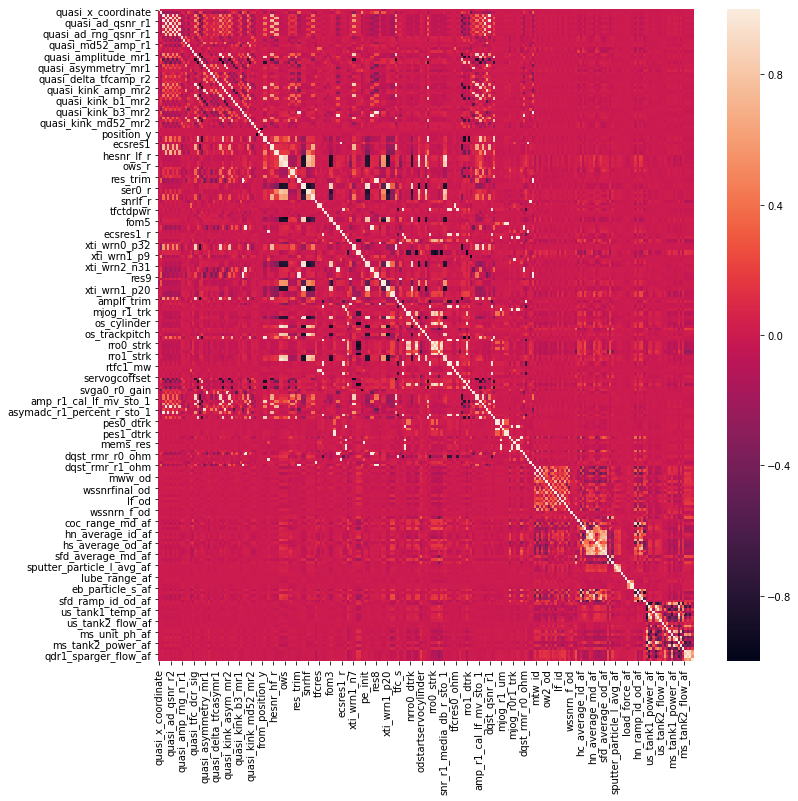

In [66]:
plt.figure(figsize = (12, 12))
sns.heatmap(X_train_con.corr())

In [67]:
# remove correlated parameters
X_train_con.drop(correlated_feat, axis = 1, inplace = True) 
X_test_con.drop(correlated_feat, axis = 1, inplace = True)
X_val_con.drop(correlated_feat, axis = 1, inplace = True)

X_train_con.shape, X_test_con.shape, X_val_con.shape

((110117, 114), (33035, 114), (14159, 114))

#### 2. Categorical Variables

#### a. remove only 1 category variables

In [68]:
constant_var = []

for var in X_train_cat.columns:
    if len(X_train_cat[var].dropna().unique()) == 1:
        constant_var.append(var)
len(constant_var)

5

In [69]:
constant_var

['quasi_operation_id', 'map_gen', 'disk_size', 'disk_thickness', 'Wafer_EC']

In [70]:
X_train_cat.drop(constant_var, axis = 1, inplace = True) 
X_test_cat.drop(constant_var, axis = 1, inplace = True)
X_val_cat.drop(constant_var, axis = 1, inplace = True)

X_train_cat.shape, X_test_cat.shape, X_val_cat.shape

((110117, 52), (33035, 52), (14159, 52))

#### b. remove NAs variables

In [71]:
missing_var = [var for var in  X_train_cat.isnull().mean().index if X_train_cat[var].isnull().mean() > 0.4]

len(missing_var)

6

In [72]:
missing_var

['experiment_id',
 'fe_cleaning_rsc',
 'eb_particle_l',
 'sz_mag_tester_id',
 'magrule',
 'deco_wash_tool']

In [73]:
X_train_cat.drop(missing_var, axis = 1, inplace = True) 
X_test_cat.drop(missing_var, axis = 1, inplace = True)
X_val_cat.drop(missing_var, axis = 1, inplace = True)

X_train_cat.shape, X_test_cat.shape, X_val_cat.shape

((110117, 46), (33035, 46), (14159, 46))

#### c. remove quasi-constant features

In [74]:
quasi_constant_var = []
for var in X_train_cat.columns:
    predominant = (X_train_cat[var].value_counts() / np.float(
        len(X_train_cat))).sort_values(ascending = False).values[0]
    
    if predominant > 0.8:
        quasi_constant_var.append(var)

len(quasi_constant_var)

5

In [75]:
quasi_constant_var

['band', 'lube_rsc', 'gld_disks', 'variety', 'substrate']

In [76]:
X_train_cat.drop(quasi_constant_var, axis = 1, inplace = True) 
X_test_cat.drop(quasi_constant_var, axis = 1, inplace = True)
X_val_cat.drop(quasi_constant_var, axis = 1, inplace = True)

X_train_cat.shape, X_test_cat.shape, X_val_cat.shape

((110117, 41), (33035, 41), (14159, 41))

#### d. remove duplicated features

In [77]:
duplicated_var = []

for i in range(len(X_train_cat.columns)):
    if i%10 == 0:
        print(i)
        
    col_1 = X_train_cat.columns[i]
    
    for col_2 in X_train_cat.columns[i + 1:]:
        if X_train_cat[col_1].equals(X_train_cat[col_2]):
            duplicated_var.append(col_2)

len(duplicated_var)

0
10
20
30
40


0

### Missing data imputation

#### 1. Continuous variables

In [78]:
# find feature names for missing data
all_cols = [c for c in X_train_con.columns.tolist()]
missing_f_train_con = []
missing_f_test_con = []
missing_f_val_con = []

for col in all_cols:
    if X_train_con[col].isnull().sum() > 0:
        missing_f_train_con.append(col)
        print('column : {} | Nulls : {}'.format(col, X_train_con[col].isnull().sum()))
        
print('='*50)
        
for col in all_cols:
    if X_test_con[col].isnull().sum() > 0:
        missing_f_test_con.append(col)
        print('column : {} | Nulls : {}'.format(col, X_test_con[col].isnull().sum()))
        
print('='*50)
        
for col in all_cols:
    if X_val_con[col].isnull().sum() > 0:
        missing_f_val_con.append(col)
        print('column : {} | Nulls : {}'.format(col, X_val_con[col].isnull().sum()))

column : quasi_ad_qsnr2_r1 | Nulls : 171
column : quasi_ad_qsnr2_r2 | Nulls : 155
column : quasi_amp_rng_n_r1 | Nulls : 171
column : quasi_amp_rng_n_r2 | Nulls : 112
column : quasi_md52_amp_r1 | Nulls : 129
column : quasi_md52_amp_r2 | Nulls : 155
column : quasi_tfc_dcr_res | Nulls : 152
column : quasi_tfc_dcr_sig | Nulls : 171
column : quasi_amplitude_mr1 | Nulls : 113
column : quasi_amplitude_mr2 | Nulls : 113
column : quasi_asymmetry_mr1 | Nulls : 172
column : quasi_asymmetry_mr2 | Nulls : 118
column : quasi_coil_res | Nulls : 171
column : quasi_delta_tfcamp_r1 | Nulls : 118
column : quasi_delta_tfcamp_r2 | Nulls : 145
column : quasi_delta_tfcasymr1 | Nulls : 141
column : quasi_delta_tfcasymr2 | Nulls : 172
column : quasi_kink_b1_mr2 | Nulls : 142
column : quasi_kink_b2_mr1 | Nulls : 129
column : quasi_kink_b2_mr2 | Nulls : 110
column : quasi_kink_b3_mr1 | Nulls : 172
column : quasi_kink_b3_mr2 | Nulls : 161
column : quasi_rcold_res_mr1 | Nulls : 125
column : quasi_rcold_res_mr2 | N

In [79]:
len(missing_f_train_con), len(missing_f_test_con), len(missing_f_val_con)

(81, 81, 81)

In [80]:
# get all missing feature names
missing_f_con = []

for i in missing_f_train_con:
    if i not in missing_f_test_con:
        missing_f_con.append(i)

missing_f_con = missing_f_con + missing_f_test_con

for j in missing_f_val_con:
    if j not in missing_f_con:
        missing_f_con.append(j)
        
len(missing_f_con)

81

#### random imputation (keep the same distribution as previous data)

In [81]:
random_imputer = mdi.RandomSampleImputer(variables = missing_f_con, random_state = 0)

random_imputer.fit(X_train_con)

RandomSampleImputer(random_state=0, seed='general', seeding_method='add',
                    variables=['quasi_ad_qsnr2_r1', 'quasi_ad_qsnr2_r2',
                               'quasi_amp_rng_n_r1', 'quasi_amp_rng_n_r2',
                               'quasi_md52_amp_r1', 'quasi_md52_amp_r2',
                               'quasi_tfc_dcr_res', 'quasi_tfc_dcr_sig',
                               'quasi_amplitude_mr1', 'quasi_amplitude_mr2',
                               'quasi_asymmetry_mr1', 'quasi_asymmetry_mr2',
                               'quasi_coil_res', 'quasi_delta_tfcamp_r1',
                               'quasi_delta_tfcamp_r2', 'quasi_delta_tfcasymr1',
                               'quasi_delta_tfcasymr2', 'quasi_kink_b1_mr2',
                               'quasi_kink_b2_mr1', 'quasi_kink_b2_mr2',
                               'quasi_kink_b3_mr1', 'quasi_kink_b3_mr2',
                               'quasi_rcold_res_mr1', 'quasi_rcold_res_mr2',
                       

In [82]:
X_train_con = random_imputer.transform(X_train_con)
X_test_con = random_imputer.transform(X_test_con)
X_val_con = random_imputer.transform(X_val_con)

X_train_con.shape, X_test_con.shape, X_val_con.shape

((110117, 114), (33035, 114), (14159, 114))

In [83]:
X_train_con.isnull().sum().sum(), X_test_con.isnull().sum().sum(), X_val_con.isnull().sum().sum()

(0, 0, 0)

#### 2. Categorical Variables

In [84]:
# find feature names for missing data
all_cols = [c for c in X_train_cat.columns.tolist()]
missing_f_train_cat = []
missing_f_test_cat = []
missing_f_val_cat = []

for col in all_cols:
    if X_train_cat[col].isnull().sum() > 0:
        missing_f_train_cat.append(col)
        print('column : {} | Nulls : {}'.format(col, X_train_cat[col].isnull().mean()))
        
print('='*50)
        
for col in all_cols:
    if X_test_cat[col].isnull().sum() > 0:
        missing_f_test_cat.append(col)
        print('column : {} | Nulls : {}'.format(col, X_test_cat[col].isnull().mean()))
        
print('='*50)
        
for col in all_cols:
    if X_val_cat[col].isnull().sum() > 0:
        missing_f_val_cat.append(col)
        print('column : {} | Nulls : {}'.format(col, X_val_cat[col].isnull().mean()))

column : disk_side | Nulls : 0.00027243749829726564
column : disks_lot_number | Nulls : 0.002079606237002461
column : fglotslot | Nulls : 0.024610187346186328
column : motherlotslot | Nulls : 0.024610187346186328
column : wash_rsc | Nulls : 0.024610187346186328
column : sputter_rsc | Nulls : 0.024610187346186328
column : eb_rsc | Nulls : 0.024610187346186328
column : test_rsc | Nulls : 0.02501884359363223
column : test_prd | Nulls : 0.024610187346186328
column : fe_issue_rsc | Nulls : 0.21618823614882351
column : fe_plating_rsc | Nulls : 0.21268287367073205
column : fe_plating_run | Nulls : 0.21268287367073205
column : fe_anneal_rsc | Nulls : 0.21350926741556708
column : fe_grouping_rsc | Nulls : 0.2057629612139815
column : fe_polish_1st_rsc | Nulls : 0.20468229247073566
column : fe_polish_2nd_rsc | Nulls : 0.18177029886393564
column : fe_test_prc | Nulls : 0.18088941761944113
column : fe_test_prd | Nulls : 0.18088941761944113
column : fe_bagging_rsc | Nulls : 0.14698911158131805
colum

In [85]:
len(missing_f_train_cat), len(missing_f_test_cat), len(missing_f_val_cat)

(24, 24, 24)

In [86]:
# get all missing feature names
missing_f_cat = []

for i in missing_f_train_cat:
    if i not in missing_f_test_cat:
        missing_f_cat.append(i)

missing_f_cat = missing_f_cat + missing_f_test_cat

for j in missing_f_val_cat:
    if j not in missing_f_cat:
        missing_f_cat.append(j)
        
len(missing_f_cat)

24

In [87]:
X_train_cat['fe_issue_rsc'].value_counts()

L8     57094
L11    17612
JL3    10392
L9       734
L10      477
JL1        2
Name: fe_issue_rsc, dtype: int64

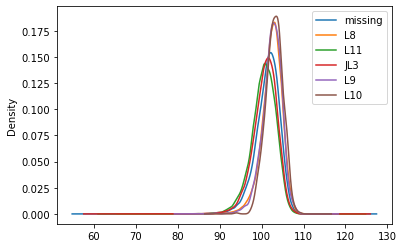

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)

data[data['fe_issue_rsc'].isnull()]['pACC'].plot(kind = 'kde', ax = ax)
data[data['fe_issue_rsc']=='L8']['pACC'].plot(kind = 'kde', ax = ax)
data[data['fe_issue_rsc']=='L11']['pACC'].plot(kind = 'kde', ax = ax)
data[data['fe_issue_rsc']=='JL3']['pACC'].plot(kind = 'kde', ax = ax)
data[data['fe_issue_rsc']=='L9']['pACC'].plot(kind = 'kde', ax = ax)
data[data['fe_issue_rsc']=='L10']['pACC'].plot(kind = 'kde', ax = ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['missing', 'L8', 'L11', 'JL3', 'L9', 'L10']
ax.legend(lines, labels, loc = 'best')

In [89]:
def automate_plot(variable, df=data, target='pACC'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in [var for var in df[variable].dropna().unique() if df[variable].value_counts()[var] > 1]:
        df[df[variable].isnull()][target].plot(kind = 'kde', ax = ax)
        df[df[variable]==category][target].plot(kind='kde', ax=ax)       
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    plt.xlabel(var)
    plt.ylabel('pACC')
    
    plt.show()       

In [90]:
# for var in missing_f_cat:
#     automate_plot(var)

#### Imputation

In [91]:
X_train_cat[missing_f_cat].isnull().mean().sort_values(ascending = False)

batching_rsc         0.333536
fe_shipout_prd       0.285460
fe_issue_rsc         0.216188
fe_anneal_rsc        0.213509
fe_plating_rsc       0.212683
fe_plating_run       0.212683
fe_grouping_rsc      0.205763
fe_polish_1st_rsc    0.204682
fe_polish_2nd_rsc    0.181770
fe_test_prd          0.180889
fe_test_prc          0.180889
fe_bagging_rsc       0.146989
test_rsc             0.025019
sputter_rsc          0.024610
fglotslot            0.024610
motherlotslot        0.024610
wash_rsc             0.024610
test_prd             0.024610
eb_rsc               0.024610
ghtdsf               0.024610
mag_disks            0.024610
ghtds_t2p1           0.024610
disks_lot_number     0.002080
disk_side            0.000272
dtype: float64

In [92]:
missing_var_low = ['test_rsc','sputter_rsc','fglotslot','motherlotslot','wash_rsc','test_prd','eb_rsc','ghtdsf','mag_disks',
                   'ghtds_t2p1','disks_lot_number','disk_side']
missing_var_high = ['batching_rsc','fe_shipout_prd','fe_issue_rsc','fe_anneal_rsc','fe_plating_rsc','fe_plating_run','fe_grouping_rsc',
                    'fe_polish_1st_rsc','fe_polish_2nd_rsc','fe_test_prd','fe_test_prc','fe_bagging_rsc']

len(missing_var_low), len(missing_var_high)

(12, 12)

In [93]:
freq_imputer = mdi.FrequentCategoryImputer(variables=missing_var_low)

freq_imputer.fit(X_train_cat)

FrequentCategoryImputer(variables=['test_rsc', 'sputter_rsc', 'fglotslot',
                                   'motherlotslot', 'wash_rsc', 'test_prd',
                                   'eb_rsc', 'ghtdsf', 'mag_disks',
                                   'ghtds_t2p1', 'disks_lot_number',
                                   'disk_side'])

In [94]:
X_train_cat = freq_imputer.transform(X_train_cat)
X_test_cat = freq_imputer.transform(X_test_cat)
X_val_cat = freq_imputer.transform(X_val_cat)

X_train_cat.isnull().sum().sum(), X_test_cat.isnull().sum().sum(), X_val_cat.isnull().sum().sum()

(283556, 86033, 37766)

In [95]:
cat_imputer = mdi.CategoricalVariableImputer(variables=missing_var_high)

cat_imputer.fit(X_train_cat)

CategoricalVariableImputer(variables=['batching_rsc', 'fe_shipout_prd',
                                      'fe_issue_rsc', 'fe_anneal_rsc',
                                      'fe_plating_rsc', 'fe_plating_run',
                                      'fe_grouping_rsc', 'fe_polish_1st_rsc',
                                      'fe_polish_2nd_rsc', 'fe_test_prd',
                                      'fe_test_prc', 'fe_bagging_rsc'])

In [96]:
X_train_cat = cat_imputer.transform(X_train_cat)
X_test_cat = cat_imputer.transform(X_test_cat)
X_val_cat = cat_imputer.transform(X_val_cat)

X_train_cat.isnull().sum().sum(), X_test_cat.isnull().sum().sum(), X_val_cat.isnull().sum().sum()

(0, 0, 0)

In [97]:
# random_imputer_var = mdi.RandomSampleImputer(variables = missing_var_high, random_state = 0)

# random_imputer_var.fit(X_train_cat)

In [98]:
X_train_cat.head(10)

,disk_side,disks_lot_number,quasi_quad,quasi_stat_number,quasi_spec_id,quasi_tool_id,flash_field,class_id,class_description,product_id,...,fe_polish_2nd_rsc,fe_test_prc,fe_test_prd,fe_bagging_rsc,fe_shipout_prd,mag_disks,ghtdsf,ghtds_t2p1,batching_rsc,Grade
24685,B,5.0,9,771,PCU-RE-BTM_301C,PHO 0771,9,11,FOC_NPI_MP,C3_B_B,...,8P7,HTS,1090002,8AS1,1090002,2.0,24.0,1.0,BAT3001,G3
114745,A,28.0,15,746,PCU-RE-TOP_301C,PHO 0746,15,11,FOC_NPI_MP,C3_T_B,...,8P8,HTS,1.09e+06,8AS1,1.09e+06,2.0,24.0,0.0,BAT3001,G1
84591,B,5.0,11,771,PCU-RE-BTM_301C,PHO 0771,11,26,FOC_NPI,C3_B_B,...,4P9,TEST,856SW1D,4AS1ERN,856SW1D,2.0,25.0,0.0,BAT3001,G1
126760,B,41.0,7,771,PCU-RE-BTM_301C,PHO 0771,7,11,FOC_NPI_MP,C3_B_B,...,8P7,HTS,1.09e+06,8AS1,1.09e+06,2.0,24.0,0.0,BAT3001,G1
62920,B,16.0,12,771,PCU-RE-BTM_301C,PHO 0771,12,26,FOC_NPI,C3_B_B,...,4P9,TEST,856SW1D,4AS1ERN,856SW1D,2.0,24.0,0.0,BAT3001,G2
104165,A,40.0,8,753,PCU-RE-TOP_301C,PHO 0753,8,11,FOC_NPI_MP,C3_T_B,...,9P7,HTS,1.09e+06,10AS1,1.09e+06,2.0,24.0,0.0,BAT3001,G1
94246,A,11.0,8,747,PCU-RE-TOP_301C,PHO 0747,8,11,FOC_NPI_MP,C3_T_B,...,8P9,HTS,1.09e+06,8AS1,1.09e+06,7.0,24.0,1.0,Missing,G1
120121,B,44.0,9,744,PCU-RE-BTM_301C,PHO 0744,9,11,FOC_NPI_MP,C3_B_B,...,9P7,HTS,1.09e+06,10AS1,1.09e+06,1.0,24.0,0.0,BAT3001,G1
26433,B,7.0,17,757,PCU-RE-BTM_301C,PHO 0757,17,11,FOC_NPI_MP,C3_B_B,...,8P6,HTS,1090002,8AS1,1090002,3.0,25.0,0.0,Missing,G3
152220,A,40.0,4,752,PCU-RE-TOP_301C,PHO 0752,4,0,PROD,C3_T_B,...,9P6,HTS,1.09e+06,9AS1,1.09e+06,2.0,23.0,1.0,BAT3001,G1


### Feature Engineering

#### 1. Continuous variables

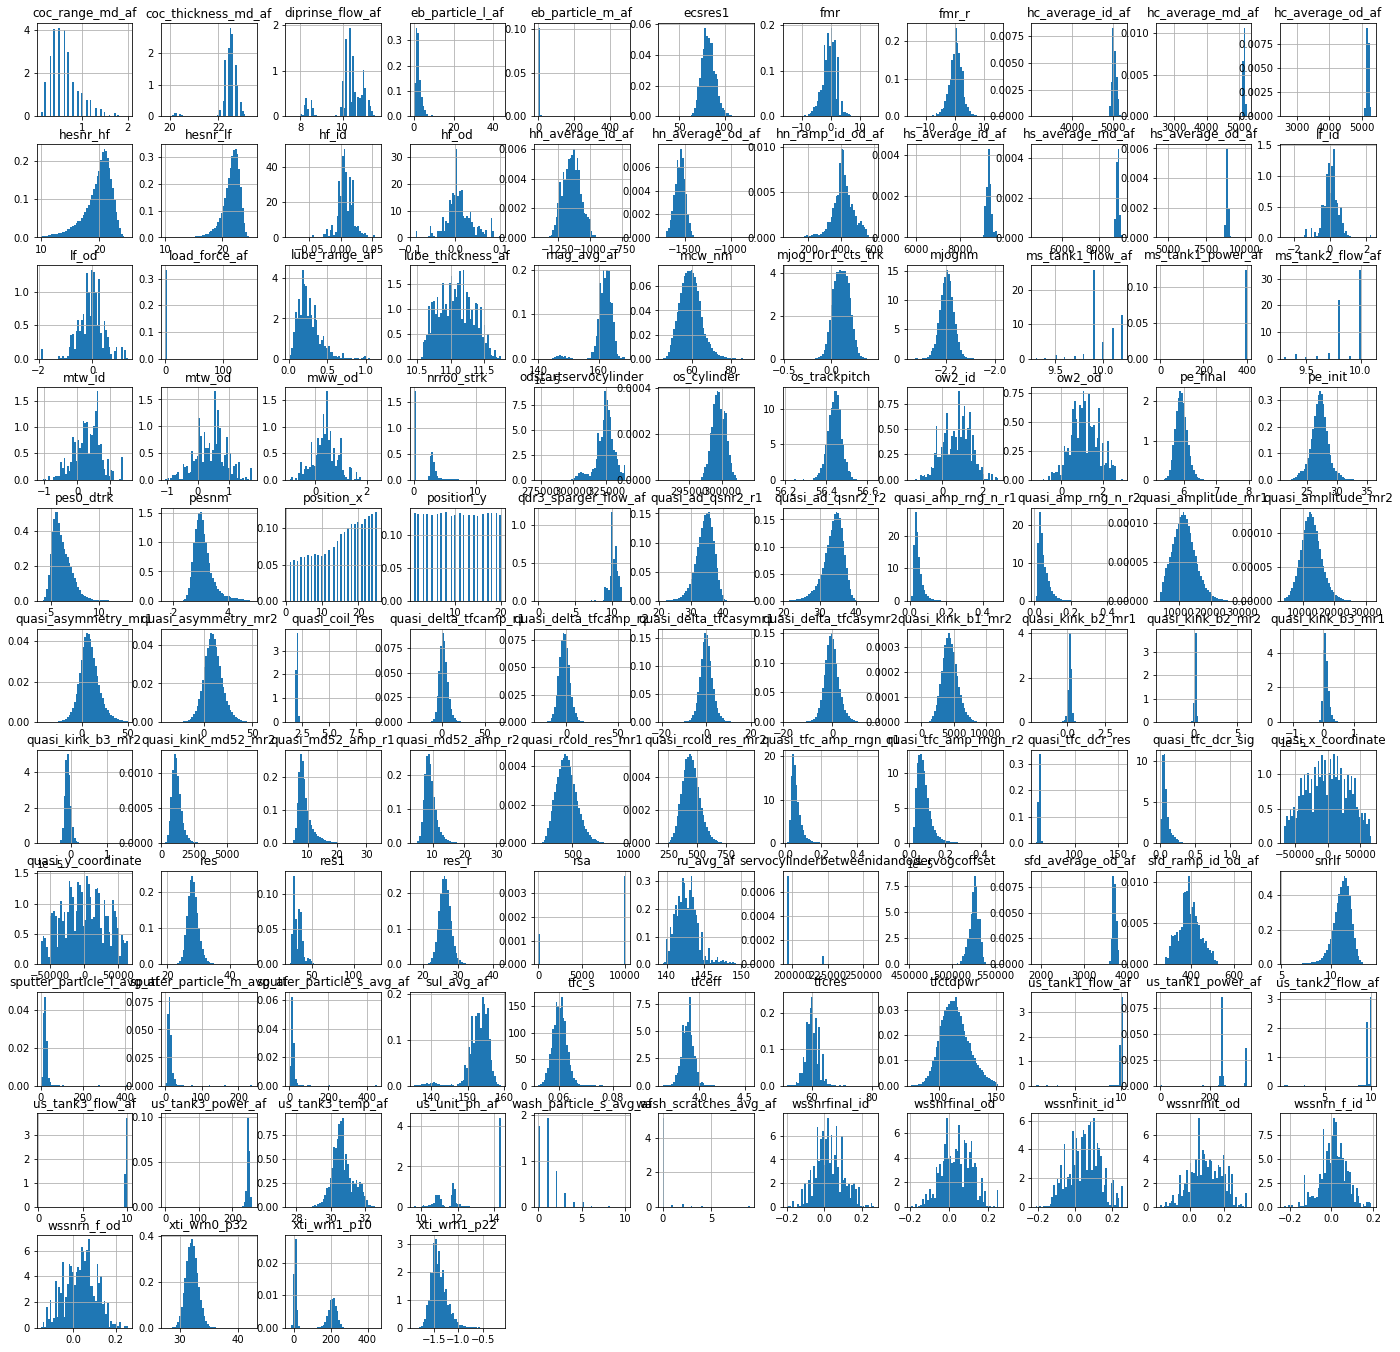

In [99]:
X_train_con.hist(bins = 50, density = True, figsize = (24, 24))
plt.show()

In [1]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(df)

NameError: name 'df' is not defined

In [100]:
def log_trans(data):
    data_log = pd.DataFrame()
    for col in data.columns.tolist():
            data_log[col] = np.log(abs(data[col]) + 1)
            
    return data_log

In [101]:
X_train_con_log = log_trans(X_train_con)
X_test_con_log = log_trans(X_test_con)
X_val_con_log = log_trans(X_val_con)

#### 2. Categorical variables (one-hot encoding)

In [102]:
for var in X_train_cat.columns.tolist():
    if X_train_cat[var].dtype == 'float64':
        X_train_cat = X_train_cat.astype('O')
        
X_train_cat.dtypes

disk_side                 object
disks_lot_number          object
quasi_quad                object
quasi_stat_number         object
quasi_spec_id             object
quasi_tool_id             object
flash_field               object
class_id                  object
class_description         object
product_id                object
head_type_number          object
engineering_change_fab    object
spec_version              object
recipe_name               object
buried_holder_type        object
buried_holder             object
gatetiming_wrsctdly       object
gatetiming                object
fglotslot                 object
motherlotslot             object
wash_rsc                  object
sputter_rsc               object
eb_rsc                    object
test_rsc                  object
test_prd                  object
fe_issue_rsc              object
fe_plating_rsc            object
fe_plating_run            object
fe_anneal_rsc             object
fe_grouping_rsc           object
fe_polish_

In [103]:
encoder = ce.OneHotCategoricalEncoder(variables=X_train_cat.columns.tolist(), drop_last=True)
encoder.fit(X_train_cat)

OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                         variables=['disk_side', 'disks_lot_number',
                                    'quasi_quad', 'quasi_stat_number',
                                    'quasi_spec_id', 'quasi_tool_id',
                                    'flash_field', 'class_id',
                                    'class_description', 'product_id',
                                    'head_type_number',
                                    'engineering_change_fab', 'spec_version',
                                    'recipe_name', 'buried_holder_type',
                                    'buried_holder', 'gatetiming_wrsctdly',
                                    'gatetiming', 'fglotslot', 'motherlotslot',
                                    'wash_rsc', 'sputter_rsc', 'eb_rsc',
                                    'test_rsc', 'test_prd', 'fe_issue_rsc',
                                    'fe_plating_rsc', 'fe_plating_run',
          

In [104]:
X_train_cat = encoder.transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)
X_val_cat = encoder.transform(X_val_cat)

X_train_cat.shape, X_test_cat.shape, X_val_cat.shape

((110117, 532), (33035, 532), (14159, 532))

### Combine continuous and categorical variables

In [105]:
X_train_final = pd.concat([X_train_con_log, X_train_cat], axis = 1)
X_test_final = pd.concat([X_test_con_log, X_test_cat], axis = 1)
X_val_final = pd.concat([X_val_con_log, X_val_cat], axis = 1)

X_train_final.shape, X_test_final.shape, X_val_final.shape

((110117, 646), (33035, 646), (14159, 646))

### 特征选择

#### Select by model importance gradient boosted machines

##### 1. SelectFromModel

In [106]:
sel_ = SelectFromModel(GradientBoostingRegressor())
sel_.fit(X_train_final, y_train)

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                    criterion='friedman_mse',
                                                    init=None,
                                                    learning_rate=0.1,
                                                    loss='ls', max_depth=3,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                     

In [107]:
selected_feat = X_train_final.columns[sel_.get_support()]
len(selected_feat)

18

In [108]:
selected_feat

# ['quasi_y_coordinate', 'quasi_ad_qsnr2_r1', 'quasi_ad_qsnr2_r2',
#        'quasi_amplitude_mr1', 'quasi_amplitude_mr2', 'quasi_rcold_res_mr2',
#        'hesnr_hf', 'hesnr_lf', 'mcw_nm', 'res', 'res_r', 'xti_wrn1_p22',
#        'mjog_r0r1_cts_trk', 'spec_version_LEC0M02', 'eb_rsc_YAC-3057L',
#        'test_prd_PCRH', 'Grade_G1']

Index(['quasi_y_coordinate', 'quasi_ad_qsnr2_r1', 'quasi_ad_qsnr2_r2',
       'quasi_amplitude_mr1', 'quasi_rcold_res_mr2', 'hesnr_hf', 'hesnr_lf',
       'mcw_nm', 'res', 'res_r', 'xti_wrn1_p22', 'mjog_r0r1_cts_trk',
       'sfd_average_od_af', 'buried_holder_type_M', 'eb_rsc_YAC-3057L',
       'test_prd_PCRH', 'Grade_G3', 'Grade_G1'],
      dtype='object')

In [167]:
selected_feat

Index(['quasi_y_coordinate', 'quasi_ad_qsnr2_r1', 'quasi_ad_qsnr2_r2',
       'quasi_amplitude_mr1', 'quasi_amplitude_mr2', 'quasi_rcold_res_mr2',
       'hesnr_hf', 'hesnr_lf', 'mcw_nm', 'res', 'res_r', 'xti_wrn1_p22',
       'mjog_r0r1_cts_trk', 'sfd_average_od_af', 'buried_holder_type_M',
       'eb_rsc_YAC-3057L', 'test_prd_PCRH', 'Grade_G1'],
      dtype='object')

In [99]:
data.groupby('spec_version')['pACC'].mean()

spec_version
LEC0BMB     100.706361
LEC0CMB     103.869628
LEC0EMB     100.963768
LEC0FMB1    101.037805
LEC0H02     101.548051
LEC0J02     101.519410
LEC0K02     102.424552
LEC0M02     101.044465
LEC0Y01     102.955460
LECMBR01    102.101241
Name: pACC, dtype: float64

#### Continuous Variables

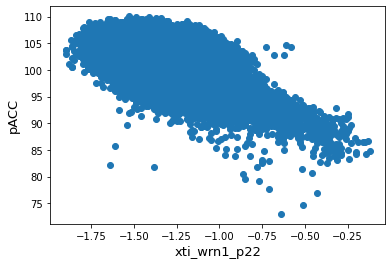

In [197]:
fig, ax = plt.subplots()
ax.scatter(x = data['xti_wrn1_p22'], y = data['pACC'])
plt.xlabel('xti_wrn1_p22', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
# plt.show()

plt.savefig('xti_wrn1_p22.jpg')

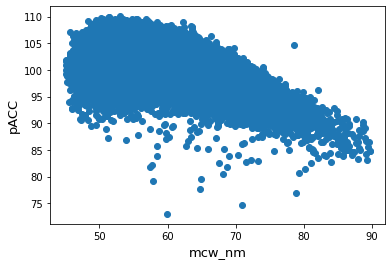

In [198]:
fig, ax = plt.subplots()
ax.scatter(x = data['mcw_nm'], y = data['pACC'])
plt.xlabel('mcw_nm', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
# plt.show()

plt.savefig('mcw_nm.jpg')

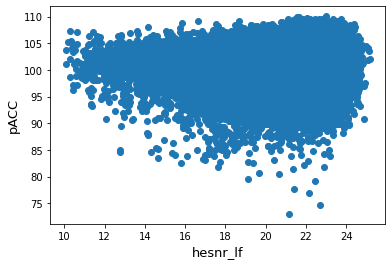

In [202]:
fig, ax = plt.subplots()
ax.scatter(x = data['hesnr_lf'], y = data['pACC'])
plt.xlabel('hesnr_lf', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
# plt.show()
plt.savefig('hesnr_lf.jpg')

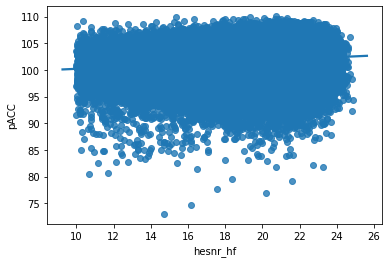

In [206]:
sns.regplot(x = 'hesnr_hf', y = 'pACC', data = data)

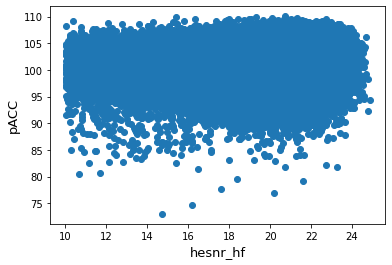

In [204]:
fig, ax = plt.subplots()
ax.scatter(x = data['hesnr_hf'], y = data['pACC'])
plt.xlabel('hesnr_hf', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
# plt.show()
plt.savefig('hesnr_hf.jpg')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['quasi_y_coordinate'], y = data['pACC'])
plt.xlabel('quasi_y_coordinate', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
plt.show()

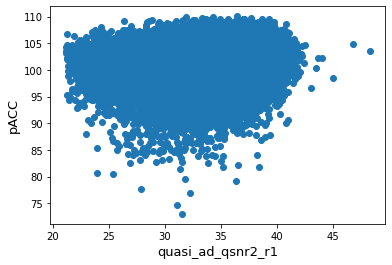

In [170]:
fig, ax = plt.subplots()
ax.scatter(x = data['quasi_ad_qsnr2_r1'], y = data['pACC'])
plt.xlabel('quasi_ad_qsnr2_r1', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
plt.show()

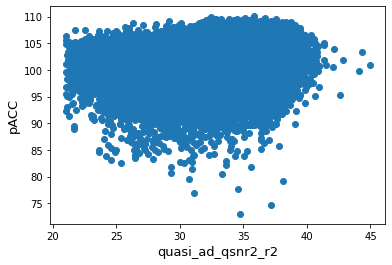

In [171]:
fig, ax = plt.subplots()
ax.scatter(x = data['quasi_ad_qsnr2_r2'], y = data['pACC'])
plt.xlabel('quasi_ad_qsnr2_r2', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['quasi_ad_qsnr2_r2'], y = data['pACC'])
plt.xlabel('quasi_ad_qsnr2_r2', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['quasi_amplitude_mr1'], y = data['pACC'])
plt.xlabel('quasi_amplitude_mr1', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['quasi_amplitude_mr2'], y = data['pACC'])
plt.xlabel('quasi_amplitude_mr2', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['quasi_rcold_res_mr2'], y = data['pACC'])
plt.xlabel('quasi_rcold_res_mr2', fontsize = 13)
plt.ylabel('pACC', fontsize = 13)
plt.show()

#### Categorical Variables

In [208]:
data.select_dtypes(include='O').columns

Index(['disk_side', 'disks_lot_number', 'quasi_operation_id', 'quasi_quad',
       'quasi_stat_number', 'quasi_spec_id', 'quasi_tool_id', 'map_gen',
       'flash_field', 'class_id', 'class_description', 'experiment_id',
       'product_id', 'head_type_number', 'engineering_change_fab',
       'spec_version', 'recipe_name', 'buried_holder_type', 'buried_holder',
       'band', 'gatetiming_wrsctdly', 'gatetiming', 'fglotslot',
       'motherlotslot', 'wash_rsc', 'sputter_rsc', 'lube_rsc', 'eb_rsc',
       'test_rsc', 'test_prd', 'fe_issue_rsc', 'fe_plating_rsc',
       'fe_plating_run', 'fe_anneal_rsc', 'fe_grouping_rsc',
       'fe_polish_1st_rsc', 'fe_polish_2nd_rsc', 'fe_cleaning_rsc',
       'fe_test_prc', 'fe_test_prd', 'fe_bagging_rsc', 'fe_shipout_prd',
       'eb_particle_l', 'gld_disks', 'mag_disks', 'ghtdsf', 'ghtds_t2p1',
       'variety', 'batching_rsc', 'disk_size', 'disk_thickness',
       'sz_mag_tester_id', 'magrule', 'substrate', 'deco_wash_tool', 'Grade'],
      dtype=

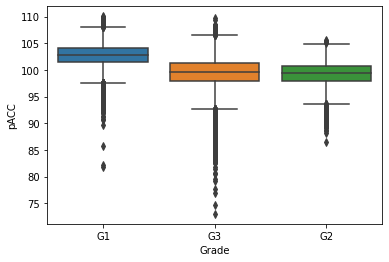

In [39]:
sns.boxplot(x = 'Grade', y = 'pACC', data = data,  order = list(data['Grade'].value_counts().index))
plt.savefig('Grade.jpg')

In [33]:
data.groupby('Grade')['pACC'].mean()

Grade
G1    102.800329
G2     99.141502
G3     99.454591
Name: pACC, dtype: float64

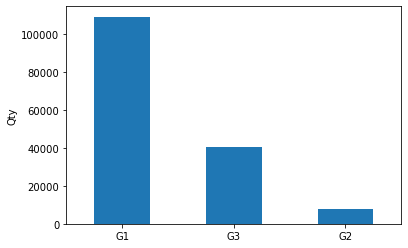

In [44]:
data['Grade'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.ylabel('Qty')
plt.savefig('Grade_qty.jpg')

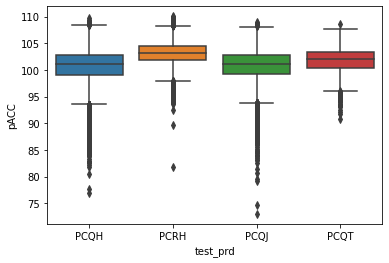

In [36]:
sns.boxplot(x = 'test_prd', y = 'pACC', data = data, order = list(data['test_prd'].value_counts().index))
plt.savefig('test_prd.jpg')

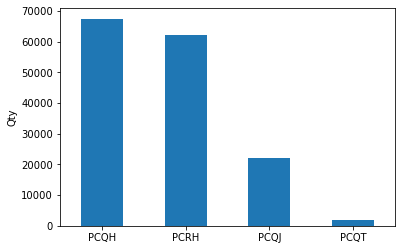

In [43]:
# plt.figure(figsize = (8, 4))
data['test_prd'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.ylabel('Qty')
plt.savefig('test_prd_qty.jpg')

In [34]:
data.groupby('test_prd')['pACC'].mean()

test_prd
PCQH    100.850313
PCQJ    100.860404
PCQT    101.827388
PCRH    103.064663
Name: pACC, dtype: float64

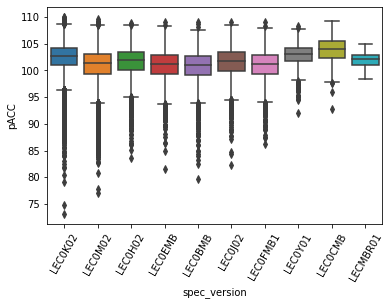

In [48]:
sns.boxplot(x = 'spec_version', y = 'pACC', data = data, order = list(data['spec_version'].value_counts().index))
plt.xticks(rotation = 60)
plt.savefig('spec_version.jpg')

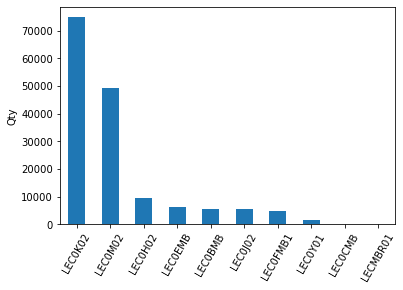

In [42]:
# plt.figure(figsize = (8, 4))
data['spec_version'].value_counts().plot.bar()
plt.xticks(rotation=60)
plt.ylabel('Qty')
plt.savefig('spec_version_qty.jpg')

In [39]:
data.groupby('spec_version')['pACC'].mean()

spec_version
LEC0BMB     100.706361
LEC0CMB     103.869628
LEC0EMB     100.963768
LEC0FMB1    101.037805
LEC0H02     101.548051
LEC0J02     101.519410
LEC0K02     102.424552
LEC0M02     101.044465
LEC0Y01     102.955460
LECMBR01    102.101241
Name: pACC, dtype: float64

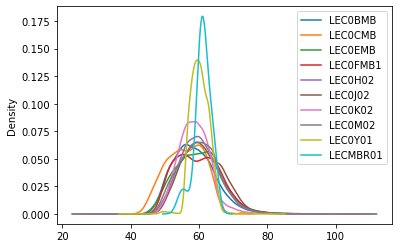

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

data[data['spec_version']=='LEC0BMB']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LEC0CMB']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LEC0EMB']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LEC0FMB1']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LEC0H02']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LEC0J02']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LEC0K02']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LEC0M02']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LEC0Y01']['mcw_nm'].plot(kind = 'kde', ax = ax)
data[data['spec_version']=='LECMBR01']['mcw_nm'].plot(kind = 'kde', ax = ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['LEC0BMB', 'LEC0CMB', 'LEC0EMB', 'LEC0FMB1', 'LEC0H02', 'LEC0J02', 'LEC0K02', 'LEC0M02', 'LEC0Y01', 'LECMBR01']
ax.legend(lines, labels, loc = 'best')
plt.savefig('MCW_BYspec_version.jpg')

In [46]:
data[['mcw_nm', 'ows']].corr()

,mcw_nm,ows
mcw_nm,1.000000,0.878496
ows,0.878496,1.000000


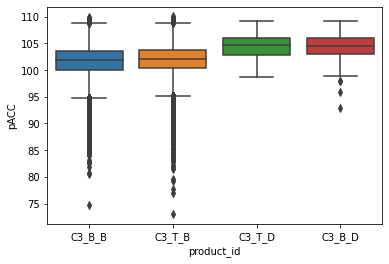

In [176]:
sns.boxplot(x = 'product_id', y = 'pACC', data = data)
plt.savefig('product_id.jpg')

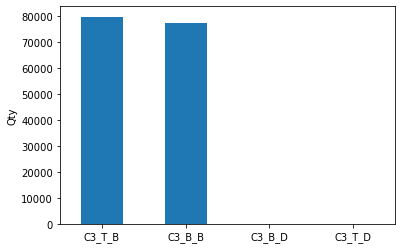

In [45]:
# plt.figure(figsize = (8, 4))
data['product_id'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.ylabel('Qty')
plt.savefig('product_id_qty.jpg')

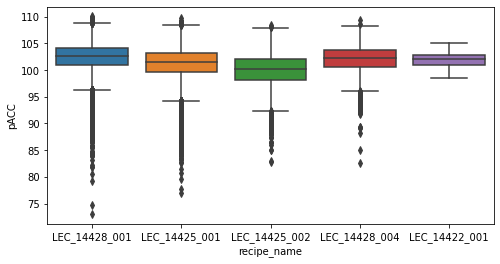

In [181]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'recipe_name', y = 'pACC', data = data)
plt.savefig('recipe_name.jpg')

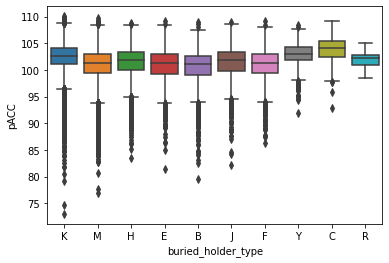

In [52]:
import pylab as pl
# plt.figure(figsize = (10, 4))
sns.boxplot(x = 'buried_holder_type', y = 'pACC', data = data, order = list(data['buried_holder_type'].value_counts().index))
# pl.xticks(rotation = 90)
plt.savefig('buried_holder_type.jpg')

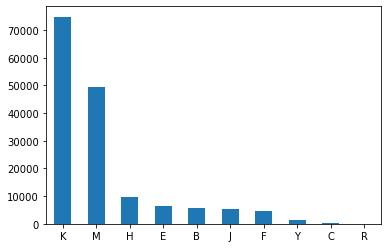

In [54]:
# plt.figure(figsize = (8, 4))
data['buried_holder_type'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.savefig('buried_holder_type_qty.jpg')

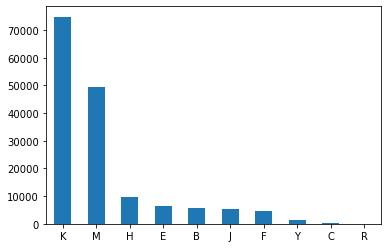

In [214]:
data['buried_holder_type'].value_counts().plot.bar()
pl.xticks(rotation=360)
plt.savefig('buried_holder_type_qty.jpg')

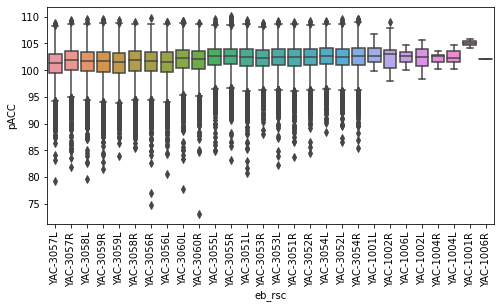

In [56]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'eb_rsc', y = 'pACC', data = data, order = list(data['eb_rsc'].value_counts().index))
plt.xticks(rotation = 90)
plt.savefig('eb_rsc.jpg')

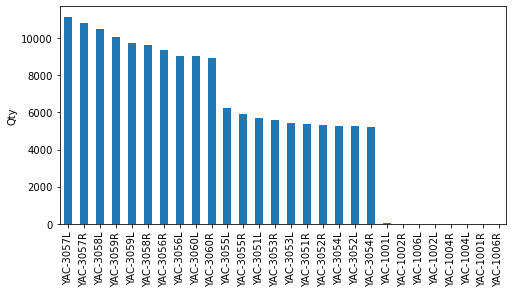

In [41]:
plt.figure(figsize = (8, 4))
data['eb_rsc'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.ylabel('Qty')
plt.savefig('eb_rsc_qty.jpg')

In [40]:
data['eb_rsc'].value_counts()

YAC-3057L    11147
YAC-3057R    10829
YAC-3058L    10490
YAC-3059R    10063
YAC-3059L     9720
YAC-3058R     9607
YAC-3056R     9340
YAC-3056L     9056
YAC-3060L     9031
YAC-3060R     8954
YAC-3055L     6244
YAC-3055R     5922
YAC-3051L     5675
YAC-3053R     5585
YAC-3053L     5437
YAC-3051R     5393
YAC-3052R     5315
YAC-3054L     5274
YAC-3052L     5272
YAC-3054R     5199
YAC-1001L       29
YAC-1002R       22
YAC-1006L       10
YAC-1002L        9
YAC-1004R        7
YAC-1004L        6
YAC-1001R        2
YAC-1006R        1
Name: eb_rsc, dtype: int64

In [35]:
data.groupby('eb_rsc')['pACC'].mean()

eb_rsc
YAC-1001L    103.069270
YAC-1001R    105.044944
YAC-1002L    102.379492
YAC-1002R    102.800371
YAC-1004L    102.456032
YAC-1004R    102.176284
YAC-1006L    102.449773
YAC-1006R    102.006999
YAC-3051L    102.162639
YAC-3051R    102.163875
YAC-3052L    102.339606
YAC-3052R    102.240447
YAC-3053L    102.312139
YAC-3053R    102.140328
YAC-3054L    102.497060
YAC-3054R    102.421740
YAC-3055L    102.354565
YAC-3055R    102.394675
YAC-3056L    101.284851
YAC-3056R    101.358346
YAC-3057L    101.092417
YAC-3057R    101.681392
YAC-3058L    101.471006
YAC-3058R    101.519324
YAC-3059L    101.173265
YAC-3059R    101.358196
YAC-3060L    101.884965
YAC-3060R    101.776307
Name: pACC, dtype: float64

In [87]:
data.groupby(by = ['eb_rsc', 'Grade']).count()

disk_side  disks_lot_number  quasi_x_coordinate  \
eb_rsc    Grade                                                    
YAC-1001L G1            29                29                  29   
YAC-1001R G1             2                 2                   2   
YAC-1002L G1             9                 9                   9   
YAC-1002R G1            22                22                  22   
YAC-1004L G1             6                 6                   6   
...                    ...               ...                 ...   
YAC-3060L G2           365               365                 365   
          G3          2128              2128                2128   
YAC-3060R G1          6233              6233                6233   
          G2           416               416                 416   
          G3          2305              2305                2305   

                 quasi_y_coordinate  quasi_operation_id  quasi_quad  \
eb_rsc    Grade                                                       
YAC-1001L G1                     29                  29          29   
YAC-1001R G1                      2                   2           2   
YAC-1002L G1                      9                   9           9   
YAC-1002R G1                     22                  22          22   
YAC-1004L G1                      6                   6           6   
...                             ...                 ...         ...   
YAC-3060L G2                    365                 365         365   
          G3                   2128                2128        2128   
YAC-3060R G1                   6233                6233        6233   
          G2                    416                 416         416   
          G3                   2305                2305        2305   

                 quasi_stat_number  quasi_spec_id  quasi_tool_id  \
eb_rsc    Grade                                                    
YAC-1001L G1                    29             29             29   
YAC-1001R G1                     2              2              2   
YAC-1002L G1                     9              9              9   
YAC-1002R G1                    22             22             22   
YAC-1004L G1                     6              6              6   
...                            ...            ...            ...   
YAC-3060L G2                   365            365            365   
          G3                  2128           2128           2128   
YAC-3060R G1                  6233           6233           6233   
          G2                   416            416            416   
          G3                  2305           2305           2305   

                 quasi_ad_qsnr2_r1  ...  ms_tank1_temp_af  ms_tank1_flow_af  \
eb_rsc    Grade                     ...                                       
YAC-1001L G1                    29  ...                28                28   
YAC-1001R G1                     2  ...                 2                 2   
YAC-1002L G1                     8  ...                 7                 7   
YAC-1002R G1                    22  ...                17                17   
YAC-1004L G1                     6  ...                 4                 4   
...                            ...  ...               ...               ...   
YAC-3060L G2                   364  ...               362               362   
          G3                  2121  ...              2114              2114   
YAC-3060R G1                  6220  ...              6208              6208   
          G2                   416  ...               412               412   
          G3                  2303  ...              2284              2284   

                 ms_tank2_power_af  ms_tank2_temp_af  ms_tank2_flow_af  \
eb_rsc    Grade                                                          
YAC-1001L G1                    28                28                28   
YAC-1001R G1                     2                 2                 2   

In [96]:
data['eb_rsc'].unique()

array(['YAC-3057L', 'YAC-3051R', 'YAC-3054L', 'YAC-3059R', 'YAC-3060R',
       'YAC-3057R', 'YAC-3051L', 'YAC-3055R', 'YAC-3058L', 'YAC-3060L',
       'YAC-3055L', 'YAC-3053L', 'YAC-3056L', 'YAC-3052R', 'YAC-3052L',
       'YAC-3056R', 'YAC-3058R', 'YAC-3059L', 'YAC-3053R', 'YAC-3054R',
       'YAC-1001L', 'YAC-1002R', nan, 'YAC-1006L', 'YAC-1002L',
       'YAC-1001R', 'YAC-1004R', 'YAC-1004L', 'YAC-1006R'], dtype=object)

In [101]:
data[['eb_rsc', 'Grade']].groupby(['eb_rsc', 'Grade'])['Grade'].count()

eb_rsc     Grade
YAC-1001L  G1         29
YAC-1001R  G1          2
YAC-1002L  G1          9
YAC-1002R  G1         22
YAC-1004L  G1          6
                    ... 
YAC-3060L  G2        365
           G3       2128
YAC-3060R  G1       6233
           G2        416
           G3       2305
Name: Grade, Length: 68, dtype: int64

##### 2. RFE

In [218]:
sel_ = RFE(GradientBoostingRegressor(), n_features_to_select = 15)
sel_.fit(X_train_final, y_train)

selected_feat_rfe = X_train_final.columns[sel_.get_support()]
len(selected_feat_rfe)

KeyboardInterrupt: 

In [ ]:
selected_feat_rfe

### 建立模型

In [86]:
selected_feat = ['quasi_y_coordinate', 'quasi_ad_qsnr2_r1', 'quasi_ad_qsnr2_r2',
       'quasi_amplitude_mr1', 'quasi_amplitude_mr2', 'quasi_rcold_res_mr2',
       'hesnr_hf', 'hesnr_lf', 'mcw_nm', 'res', 'res_r', 'xti_wrn1_p22',
       'mjog_r0r1_cts_trk', 'spec_version_LEC0M02', 'eb_rsc_YAC-3057L',
       'test_prd_PCRH', 'Grade_G1']

# selected_feat = ['Grade_G1','test_prd_PCRH','xti_wrn1_p22','mcw_nm','buried_holder_type_M','eb_rsc_YAC-3057L','hesnr_lf','res','mjog_r0r1_cts_trk','quasi_ad_qsnr2_r1']

In [93]:
# 调参
xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': range(3,8),
                    'n_estimators': [1000, 1200, 1500, 2000],
                    'learning_rate': [0.01, 0.05],
                    'subsample' : [0.4, 0.5, 0.8]},
                   verbose=1,
                   cv = 3)
clf.fit(X_train[selected_feat],y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

#### 1. Xgboost

In [103]:
xgb_model = xgb.XGBRegressor(learning_rate=0.05, 
                             max_depth=3, 
                             silent=1, 
                             random_state=7, 
                             n_estimators = 1000, 
                             subsample = 0.6) 
xgb_model.fit(X_train_final[selected_feat],y_train.ravel())

preds_train= xgb_model.predict(X_train_final[selected_feat])
R2_train = r2_score(y_pred=preds_train, y_true=y_train)
rmse_train = np.sqrt(mean_squared_error(y_pred=preds_train, y_true=y_train))
mae_train = mean_absolute_error(y_pred=preds_train, y_true=y_train)
print('training set R2:', R2_train)
print('training set RMSE:', rmse_train)
print('training set MAE:', mae_train)
print('*'*40)

preds_test = xgb_model.predict(X_test_final[selected_feat])
R2_test = r2_score(y_pred=preds_test, y_true=y_test)
rmse_test = np.sqrt(mean_squared_error(y_pred=preds_test, y_true=y_test))
mae_test = mean_absolute_error(y_pred=preds_test, y_true=y_test)
print('testing set R2:', R2_test)
print('testing set RMSE:', rmse_test)
print('training set MAE:', mae_test)

print('*'*40)
preds_val = xgb_model.predict(X_val_final[selected_feat])
R2_val = r2_score(y_pred=preds_val, y_true=y_val)
rmse_val = np.sqrt(mean_squared_error(y_pred=preds_val, y_true=y_val))
mae_val = mean_absolute_error(y_pred=preds_val, y_true=y_val)
print('validation set R2:', R2_val)
print('validation set RMSE:', rmse_val)
print('training set MAE:', mae_val)

training set R2: 0.6193285626238328
training set RMSE: 1.715017614481631
training set MAE: 1.3318614002434552
****************************************
testing set R2: 0.6121407405466295
testing set RMSE: 1.7297718958754214
training set MAE: 1.3454094270720192
****************************************
validation set R2: 0.6174990514300385
validation set RMSE: 1.7274798911582072
training set MAE: 1.3370647081185103


In [102]:
print('training set R2:', round(R2_train,3))
print('testing set R2:', round(R2_test, 3))
print('validation set R2:', round(R2_val, 3)) #training set R2: 0.649 ; testing set R2: 0.625; validation set R2: 0.636

training set R2: 0.641
testing set R2: 0.62
validation set R2: 0.627


特征排序：
特征 Grade_G1 重要度为 0.688377
特征 mcw_nm 重要度为 0.062976
特征 xti_wrn1_p22 重要度为 0.062299
特征 test_prd_PCRH 重要度为 0.054651
特征 spec_version_LEC0M02 重要度为 0.022023
特征 eb_rsc_YAC-3057L 重要度为 0.019225
特征 hesnr_lf 重要度为 0.014193
特征 res 重要度为 0.010899
特征 quasi_ad_qsnr2_r1 重要度为 0.009253
特征 mjog_r0r1_cts_trk 重要度为 0.009240
特征 res_r 重要度为 0.008157
特征 hesnr_hf 重要度为 0.007132
特征 quasi_rcold_res_mr2 重要度为 0.007050
特征 quasi_ad_qsnr2_r2 重要度为 0.006680
特征 quasi_amplitude_mr1 重要度为 0.006366
特征 quasi_amplitude_mr2 重要度为 0.006171
特征 quasi_y_coordinate 重要度为 0.005308


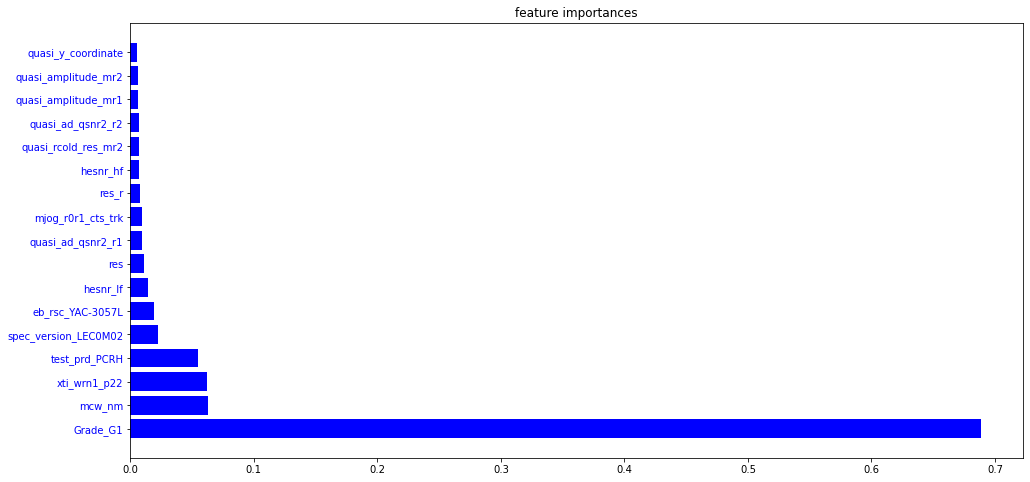

In [101]:
# feature importance
features_name = selected_feat
print('特征排序：')

feature_importances = xgb_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
# indices = indices[:17]

for index in indices:
    print("特征 %s 重要度为 %f" %(features_name[index], feature_importances[index]))

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("feature importances")
plt.barh(range(len(indices)), feature_importances[indices], color='b')
plt.yticks(range(len(indices)), np.array(features_name)[indices], color='b')
plt.savefig('Feature_importance_0707_SFM2.jpg')

In [91]:
# ['quasi_y_coordinate', 'quasi_ad_qsnr2_r1', 'quasi_ad_qsnr2_r2',
#        'quasi_amplitude_mr1', 'quasi_amplitude_mr2', 'quasi_rcold_res_mr2',
#        'hesnr_hf', 'hesnr_lf', 'mcw_nm', 'res', 'res_r', 'xti_wrn1_p22',
#        'mjog_r0r1_cts_trk', 'sfd_average_od_af', 'buried_holder_type_M',
#        'eb_rsc_YAC-3057L', 'test_prd_PCRH', 'Grade_G1']
final_vars = ['quasi_y_coordinate', 'quasi_ad_qsnr2_r1', 'quasi_ad_qsnr2_r2',
       'quasi_amplitude_mr1', 'quasi_amplitude_mr2', 'quasi_rcold_res_mr2',
       'hesnr_hf', 'hesnr_lf', 'mcw_nm', 'res', 'res_r', 'xti_wrn1_p22',
       'mjog_r0r1_cts_trk', 'sfd_average_od_af', 'buried_holder_type', 'eb_rsc', 'test_prd', 'Grade']

pd.concat([X_train[final_vars], y_train], axis = 1).to_csv('train.csv', index = False)
pd.concat([X_test[final_vars], y_test], axis = 1).to_csv('test.csv', index = False)
pd.concat([X_val[final_vars], y_val], axis = 1).to_csv('validation.csv', index = False)

#### 2. GradientBoost

In [106]:
# 调参
gbt_model = GradientBoostingRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': range(3,8),
                    'n_estimators': [1000, 1500, 2000],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'subsample' : [0.4, 0.5, 0.6]
                   },
                   verbose=1,
                   cv = 3)
clf.fit(X_train_final[selected_feat],y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [99]:
X_train_final.shape, y_train.shape

((110268, 650), (110268,))

In [113]:
gbt_model = GradientBoostingRegressor(learning_rate=0.05, 
                                      max_depth=3,  
                                      random_state=7, 
                                      n_estimators=1000, 
                                      max_features= 'sqrt',
                                      min_samples_leaf=15,
                                      min_samples_split=10,
                                      loss = 'huber')

gbt_model.fit(X_train_final[selected_feat],y_train.ravel())


preds_train= gbt_model.predict(X_train_final[selected_feat])
R2_train = r2_score(y_pred=preds_train, y_true=y_train)
print('training set R2:', R2_train)
print('training set mean_root error:', np.sqrt(mean_squared_error(y_pred=preds_train, y_true=y_train)))
print('*'*50)

preds_test = gbt_model.predict(X_test_final[selected_feat])
R2_test = r2_score(y_pred=preds_test, y_true=y_test)
print('testing set R2:', R2_test)
print('training set mean_root error:', np.sqrt(mean_squared_error(y_pred=preds_test, y_true=y_test)))

preds_validation = gbt_model.predict(X_val_final[selected_feat])
R2 = r2_score(y_pred=preds_validation, y_true=y_val)
print('*'*50)
print('Validation set R2:', R2)
print('Validation set mean_root error:', np.sqrt(mean_squared_error(y_pred=preds_validation, y_true=y_val)))

training set R2: 0.634287562755999
training set mean_root error: 1.6800219952874742
**************************************************
testing set R2: 0.6229452729957871
training set mean_root error: 1.71030858461595
**************************************************
Validation set R2: 0.6357852669820756
Validation set mean_root error: 1.674753444030694


特征排序：
特征 mcw_nm 重要度为 0.334299
特征 Grade_G1 重要度为 0.216749
特征 xti_wrn1_p22 重要度为 0.161059
特征 Grade_G3 重要度为 0.100044
特征 test_prd_PCRH 重要度为 0.045280
特征 res 重要度为 0.033123
特征 hesnr_lf 重要度为 0.023306
特征 quasi_ad_qsnr2_r2 重要度为 0.013379
特征 res_r 重要度为 0.011448
特征 quasi_ad_qsnr2_r1 重要度为 0.011251
特征 buried_holder_type_M 重要度为 0.009097
特征 quasi_rcold_res_mr2 重要度为 0.008005
特征 quasi_amplitude_mr1 重要度为 0.007635
特征 hesnr_hf 重要度为 0.007209
特征 mjog_r0r1_cts_trk 重要度为 0.005381
特征 sfd_average_od_af 重要度为 0.004731
特征 quasi_y_coordinate 重要度为 0.004719
特征 eb_rsc_YAC-3057L 重要度为 0.003284


([<matplotlib.axis.YTick at 0x1daa9fa7f60>,
 [Text(0, 0, 'mcw_nm'),
  Text(0, 0, 'Grade_G1'),
  Text(0, 0, 'xti_wrn1_p22'),
  Text(0, 0, 'Grade_G3'),
  Text(0, 0, 'test_prd_PCRH'),
  Text(0, 0, 'res'),
  Text(0, 0, 'hesnr_lf'),
  Text(0, 0, 'quasi_ad_qsnr2_r2'),
  Text(0, 0, 'res_r'),
  Text(0, 0, 'quasi_ad_qsnr2_r1'),
  Text(0, 0, 'buried_holder_type_M'),
  Text(0, 0, 'quasi_rcold_res_mr2'),
  Text(0, 0, 'quasi_amplitude_mr1'),
  Text(0, 0, 'hesnr_hf'),
  Text(0, 0, 'mjog_r0r1_cts_trk'),
  Text(0, 0, 'sfd_average_od_af'),
  Text(0, 0, 'quasi_y_coordinate'),
  Text(0, 0, 'eb_rsc_YAC-3057L')])

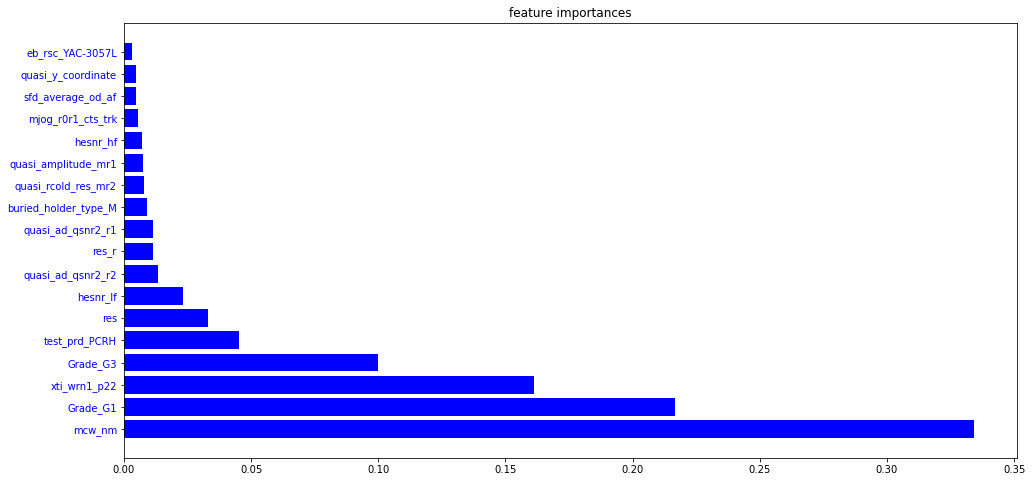

In [114]:
# feature importance
features_name = selected_feat
print('特征排序：')

feature_importances = gbt_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
# indices = indices[:17]

for index in indices:
    print("特征 %s 重要度为 %f" %(features_name[index], feature_importances[index]))

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("feature importances")
plt.barh(range(len(indices)), feature_importances[indices], color='b')
plt.yticks(range(len(indices)), np.array(features_name)[indices], color='b')
# plt.savefig('Feature_importance_0707_GraBst.jpg')

### output data

In [88]:
preds_test = pd.Series(preds_test, name = 'Pred_pACC', index = X_test.index)
out_test = pd.concat([y_test, preds_test, X_test_final[selected_feat]], axis = 1)
out_test.to_csv('Testing_pred.csv', index = False)

preds_validation = pd.Series(preds_validation, name = 'Pred_pACC', index = X_val.index)
out_validation = pd.concat([y_val, preds_validation, X_val_final[selected_feat]], axis = 1)
out_validation.to_csv('Validation_pred.csv', index = False)

preds_train = pd.Series(preds_train, name = 'Pred_pACC', index = X_train.index)
out_train = pd.concat([y_train, preds_train, X_train_final[selected_feat]], axis = 1)
out_train.to_csv('Train_pred.csv', index = False)

Text(0.5, 1.0, 'R2: 0.6206994827440371')

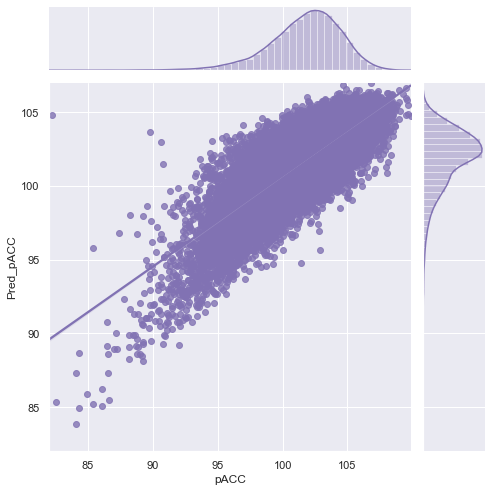

In [106]:
sns.set(style="darkgrid")

g = sns.jointplot("pACC", "Pred_pACC", data=out_test,
                  kind="reg", truncate=False,
                  xlim=(82, out_test['pACC'].max()), ylim=(82, out_test['Pred_pACC'].max()),
                  color="m", height=7)
ax.set_title('R2: ' + str(r2_score(y_test, preds_test)))
# plt.title('test')
# plt.savefig('test_actual_vs_pred.jpg')

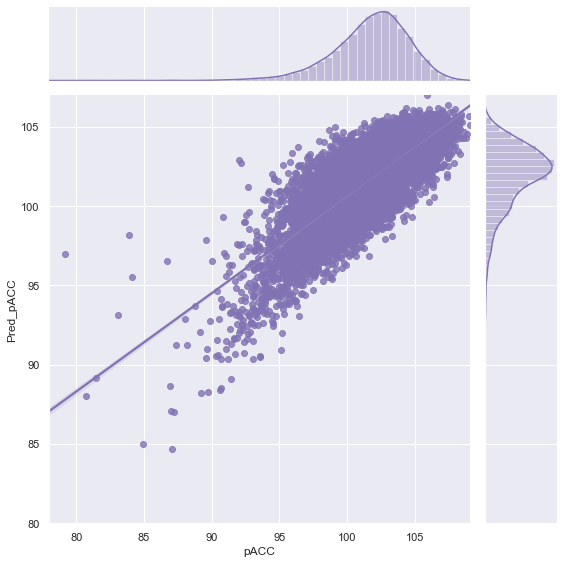

In [108]:
f = sns.jointplot("pACC", "Pred_pACC", data=out_validation,
                  kind="reg", truncate=False,
                  xlim=(78, out_validation['pACC'].max()), ylim=(80, out_validation['Pred_pACC'].max()),
                  color="m", height=8)
ax.set_title('R2: ' + str(r2_score(y_val, preds_validation)))
plt.savefig('validation_actual_vs_pred.jpg')

In [110]:
data[['quasi_y_coordinate', 'quasi_ad_qsnr2_r1', 'quasi_ad_qsnr2_r2',
       'quasi_amplitude_mr1', 'quasi_amplitude_mr2', 'quasi_rcold_res_mr2',
       'hesnr_hf', 'hesnr_lf', 'mcw_nm', 'res', 'res_r', 'xti_wrn1_p22',
       'mjog_r0r1_cts_trk', 'pACC', 'spec_version', 'eb_rsc',
       'test_prd', 'Grade']].to_csv('data_selected_feat.csv', index = False)